In [31]:
import numpy as np
import pandas as pd

In [32]:

# Set seed for reproducibility
np.random.seed(23)

# First class sample (class 1)
nu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(nu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1  # Class 1 target

# Second class sample (class 2)
nu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(nu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0  # Class 2 target

# Combine the two DataFrames
df = pd.concat([df, df1], ignore_index=True)

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

print(df)


    feature1  feature2  feature3  target
0  -0.367548 -1.137460 -1.322148       1
1   0.177061 -0.598109  1.226512       0
2   0.420623  0.411620 -0.071324       1
3   1.968435 -0.547788 -0.679418       1
4  -2.506230  0.146960  0.606195       1
5   1.425140  1.441152  0.182561       0
6   2.224431  0.230401  1.192120       0
7   0.322272  0.060343 -1.043450       1
8  -0.723253  1.461259 -0.085367       0
9   2.823378 -0.332863  2.637391       0
10 -1.389866  0.666726  1.343517       0
11 -0.331617 -1.632386  0.619114       1
12  0.666988  0.025813 -0.777619       1
13 -1.009942  0.441736  1.128877       1
14  0.384865  1.323546 -0.103193       0
15  1.676860  4.187503 -0.080565       0
16  0.241106 -0.952510 -0.136267       1
17 -0.045438  1.040886 -0.094035       1
18 -0.992574 -0.161346  1.192404       1
19  1.437892  1.099723  1.065406       0
20  0.290746  0.866975  0.982643       0
21  0.731858  0.517441  2.244610       0
22 -1.027861  1.131416  2.603234       0
23 -0.420844 -0.

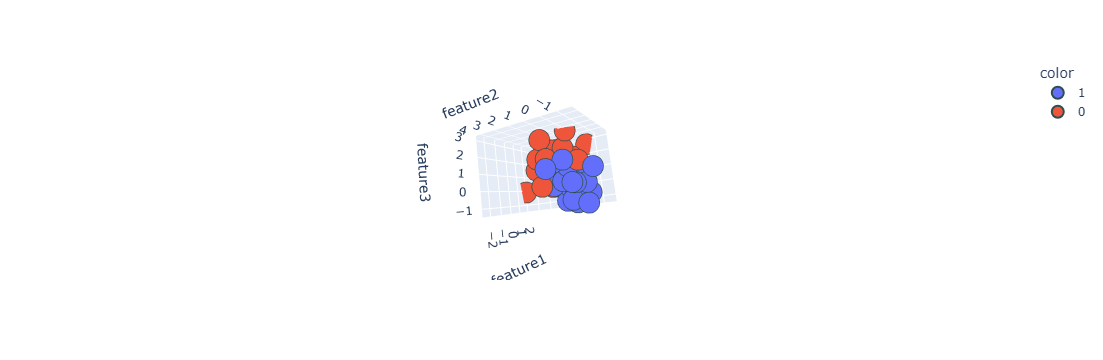

In [33]:
# data distribution visualization
import plotly.express as px
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
                    color = df['target'].astype('str'))
fig.update_traces(marker=dict(size=12, line=dict(width = 2, color = 'DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [34]:
# step1: Apply Standard Scaling (mean centering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])

In [35]:
#step2: Build Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
print('Covariance matrix: \n', covariance_matrix)

Covariance matrix: 
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [36]:
#step3: Find Eigen Values and Eigen Vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [37]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [38]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:166: UserWarning:

pylab import has clobbered these variables: ['mean']
`%matplotlib` prevents importing * from pylab and numpy



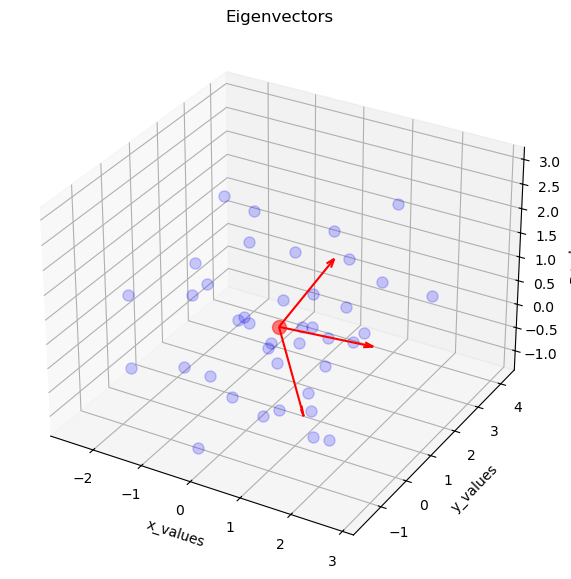

In [58]:
# 3D plot with eigenvectors
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)

# Plot the mean of the data points
mean = [df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()]
ax.plot([mean[0]], [mean[1]], [mean[2]], 'o', markersize=10, color='red', alpha=0.5)

# Plot the eigenvectors as arrows from the mean using quiver
for v in eigen_vectors.T:
    ax.quiver(mean[0], mean[1], mean[2], 
              v[0], v[1], v[2], 
              length=2, color='r', arrow_length_ratio=0.1)

# Set axis labels
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

# Show the plot
plt.show()

In [60]:
# considering largest eigen vector as principle component
pc = eigen_vectors[0:2]

In [62]:
pc

array([[ 0.61002583,  0.53982115,  0.58005311],
       [-0.69239396,  0.00718615,  0.72148387]])

In [66]:
# transformation (dimensionality reduction)
transformed_df = np.dot(df.iloc[:, 0:3], pc.T)
# 40, 3 . 3, 2 == > 40 , 2
new_df = pd.DataFrame(transformed_df, columns = ['PC1', 'PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-1.605154,-0.707594,1
1,0.496582,0.758014,0
2,0.437420,-0.339738,1
3,0.510990,-1.857058,1
4,-1.097907,2.173715,1


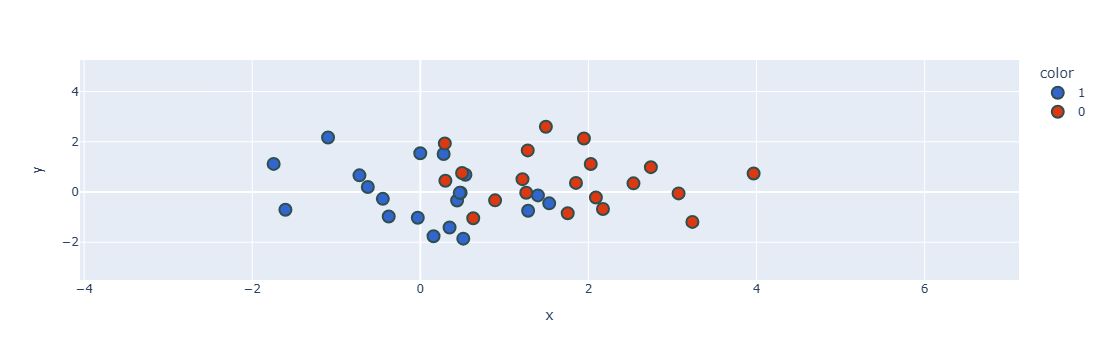

In [68]:
# 2d data distribution visualization
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()